## Numpy - Applications in Finance

In [7]:
import numpy as np

np.set_printoptions(suppress=True)

In [8]:
datafile = 'http://people.bu.edu/kalathur/datasets/AAPL.csv'

In [9]:
# Import closing price and volume from the file (columns 5 and 6)
# First column is column 0

c, v = np.loadtxt(datafile, delimiter=',', skiprows=1, usecols=(5,6), unpack=True)

c = np.round(c, 2) # Round all values to 2 decimal points

In [10]:
c[:5]

array([156.05, 140.51, 146.5 , 146.18, 148.96])

In [11]:
v[:5]

array([37039700., 91312200., 58607100., 54777800., 41025300.])

In [13]:
# number of values in the dataset

len(c)

178

In [15]:
len(v)

178

**Volume Weighted Average Price (VWAP)**

In [14]:
vwap = np.average(c, weights=v)  # Weighted average with respect to volume
print("VWAP =", vwap)
print("VWAP =", np.sum(c*v/v.sum()))

VWAP = 187.04154812148687
VWAP = 187.04154812148687


In [15]:
# Arithmetic mean

print("mean =", np.mean(c)) # average closing value price


mean = 188.89511235955058


**Value Range**

In [16]:
# Import daily high and low price from the file (columns 2 and 3)
# Unpack=true return tuple instead of list
h, l = np.loadtxt(datafile, delimiter=',', skiprows=1, usecols=(2,3), unpack=True)

h = np.round(h, 2)
l = np.round(l, 2)

In [17]:
h[:5]

array([158.85, 145.72, 148.55, 148.83, 151.82])

In [18]:
l[:5]

array([154.23, 142.  , 143.8 , 145.9 , 148.52])

In [19]:
print("highest daily high =", np.max(h))
print("lowest  daily low =", np.min(l))

highest daily high = 226.42
lowest  daily low = 142.0


In [20]:
# Spread of data ptp = peak-to-peak (max(h) - min(h))

print("Spread high price", np.ptp(h))
print("Spread low price", np.ptp(l))

Spread high price 80.69999999999999
Spread low price 80.86000000000001


In [21]:
print("Spread high price", np.max(h) - np.min(h))
print("Spread low price", np.max(l) - np.min(l))

Spread high price 80.69999999999999
Spread low price 80.86000000000001


**Statistics**

In [23]:
# Median: Average
print("median =", np.median(c))

median = 193.965


In [24]:
# Variance: measures how far a set of (random) numbers are spread out from their average value.
print("variance =", np.var(c))

variance = 354.60887891995964


In [25]:
# Standard deviation: the extent of deviation for a group as a whole.
print("Standard deviation =", np.std(c))

Standard deviation = 18.831061545222553


**Simple Returns**
 - differences between consecutive values / value of the previous day
 
 (v[1] - v[0])/v[0]

In [26]:
returns = np.diff( c ) / c[ : -1]
returns[:5]

array([-0.09958347,  0.04263042, -0.0021843 ,  0.01901765,  0.01698443])

In [27]:
np.max(returns), np.min(returns)

(0.06830225711481844, -0.09958346683755219)

In [28]:
print("Standard deviation =", np.std(returns))

Standard deviation = 0.018182188529057272


**Log Returns**
 - log of all values and calculate differences between them
 - log(a) - log(b) = log(a/b)
 - measure rate of change
 - input should not have zeros or negative numbers

In [29]:
logreturns = np.diff( np.log(c) )

In [30]:
logreturns[:5]

array([-0.10489781,  0.04174677, -0.00218669,  0.01883907,  0.0168418 ])

In [31]:
# Alternatively

logreturns = np.log(c[1:]/c[:-1])

logreturns[:5]

array([-0.10489781,  0.04174677, -0.00218669,  0.01883907,  0.0168418 ])

**Positive Returns**

In [32]:
pos_ret_indices = np.where(returns > 0)
print("Indices with positive returns\n", pos_ret_indices)

Indices with positive returns
 (array([  1,   3,   4,   5,   8,   9,  10,  11,  13,  15,  18,  19,  20,
        21,  22,  23,  25,  27,  29,  31,  32,  34,  35,  36,  37,  39,
        40,  44,  45,  46,  47,  48,  49,  50,  52,  53,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  67,  70,  71,  72,  73,  74,  75,
        79,  81,  83,  86,  90,  91,  95, 101, 104, 105, 106, 107, 108,
       109, 113, 114, 116, 120, 123, 124, 125, 128, 129, 131, 132, 135,
       137, 138, 141, 142, 144, 148, 149, 150, 153, 156, 157, 158, 159,
       162, 164, 165, 168, 169, 171, 172, 173, 176]),)


In [33]:
np.where(logreturns > 0)

(array([  1,   3,   4,   5,   8,   9,  10,  11,  13,  15,  18,  19,  20,
         21,  22,  23,  25,  27,  29,  31,  32,  34,  35,  36,  37,  39,
         40,  44,  45,  46,  47,  48,  49,  50,  52,  53,  57,  58,  59,
         60,  61,  62,  63,  64,  65,  67,  70,  71,  72,  73,  74,  75,
         79,  81,  83,  86,  90,  91,  95, 101, 104, 105, 106, 107, 108,
        109, 113, 114, 116, 120, 123, 124, 125, 128, 129, 131, 132, 135,
        137, 138, 141, 142, 144, 148, 149, 150, 153, 156, 157, 158, 159,
        162, 164, 165, 168, 169, 171, 172, 173, 176]),)

**Volatility**
 - measures price variation
 - annualized volatility is equal to the standard deviation of the log returns as a ratio of its mean, divided by one over the square root of the number of business days in a year

In [34]:
annual_volatility = np.std(logreturns)/np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1./252.) # ~ num biz days in year

print("Annual volatility", annual_volatility)


Annual volatility 150.0488985319145


In [36]:
print("Monthly volatility", annual_volatility * np.sqrt(1./12.))

Monthly volatility 43.31538597950384


**Dealing with Dates**

In [37]:
from datetime import datetime
import calendar

Monday 0, Tuesday 1, Wednesday 2, Thursday 3, Friday 4, Saturday 5, Sunday 6

In [38]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [39]:
def datestr2num(s):
   return datetime.strptime(s, "%Y-%m-%d").date().weekday()

In [40]:
calendar.day_name[datestr2num('2019-9-30')]

'Monday'

In [41]:
calendar.day_name[datestr2num('2019-10-1')]

'Tuesday'

In [42]:
# Import Date and closing price from the file (columns 0 and 5)

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [43]:
close[:5]

array([156.05, 140.51, 146.5 , 146.18, 148.96])

In [44]:
dates[:5]

array([2., 3., 4., 0., 1.])

In [45]:
np.unique(dates)

array([0., 1., 2., 3., 4.])

In [46]:
# averages based on day of week

averages = np.zeros(len(np.unique(dates)))

for i in range(5):
    indices = np.where(dates == i) 
    prices  = np.take(close, indices)
    avg = np.mean(prices)
    avg = np.round(avg)
    print("Day", i, "Average", avg)
    averages[i] = avg

Day 0 Average 190.0
Day 1 Average 189.0
Day 2 Average 189.0
Day 3 Average 188.0
Day 4 Average 188.0


In [47]:
top = np.max(averages)
print("Highest average:", top)
print("Top day of the week index:", np.argmax(averages))
print("Top day of the week is", calendar.day_name[np.argmax(averages)])
print()

bottom = np.min(averages)
print("Lowest average:", bottom)
print("Bottom day of the week index:", np.argmin(averages))
print("Bottom day of the week is", calendar.day_name[np.argmin(averages)])

Highest average: 190.0
Top day of the week index: 0
Top day of the week is Monday

Lowest average: 188.0
Bottom day of the week index: 3
Bottom day of the week is Thursday


## Average True Range (ATR)
 - provides degree of price volatility
 - N-period smoothed moving average of the true range values
 - Recommended 14 period smoothing
 - Range of a day : $ (high-low) $
 - True Range TR = $ max[(high-low), abs(high-close_{prev}), abs(low-close_{prev})] $
 - $$ATR_{t} = \frac{ ATR_{t-1} * (N-1) + TR_{t} }{N}$$
 - First ATR is the arithmetic mean of the first N TR values
 
 

Example: https://school.stockcharts.com/doku.php?id=technical_indicators:average_true_range_atr

<img src="https://school.stockcharts.com/lib/exe/fetch.php?media=technical_indicators:average_true_range_atr:atr-2-qqqqsh.png"/>

In [48]:
dates, open , high, low, close = np.loadtxt(datafile, delimiter=',',
                                     skiprows=1, usecols=(0,1,2,3,4), 
                                            converters={0: datestr2num},
                                            encoding='utf-8',
                                            unpack=True)

open  = np.round(open, 2)
high  = np.round(high, 2)
low   = np.round(low, 2)
close = np.round(close, 2)

In [49]:
num_days = len(high)
num_days

178

In [52]:
# ATR Window

N = 14

In [53]:
previous_close = close[: -1]

In [54]:
# TR except for first day

truerange = np.maximum(high[1:] - low[1:], 
                       np.abs(high[1:] - previous_close), 
                       np.abs(previous_close - low[1:]) )

# first day true range = (high[0] - low[0])
truerange = np.insert(truerange, 0, (high[0] - low[0]))

truerange


array([ 4.62, 12.2 ,  6.36,  2.93,  3.89,  4.9 ,  3.11,  2.19,  2.05,
        3.39,  2.88,  4.4 ,  2.02,  4.11,  3.44,  2.74,  5.43,  2.67,
        4.02, 11.47,  4.44,  3.05,  5.14,  3.83,  2.72,  3.6 ,  2.24,
        1.96,  1.57,  2.56,  1.88,  1.95,  1.95,  2.39,  2.07,  1.94,
        2.9 ,  2.13,  2.27,  1.99,  2.26,  3.78,  1.46,  1.55,  2.42,
        3.57,  6.21,  3.77,  2.39,  2.39,  3.6 ,  2.6 ,  3.07,  4.76,
        8.17,  6.91,  5.38,  8.3 ,  3.21,  2.03,  1.54,  3.3 ,  3.41,
        3.35,  3.23,  1.41,  3.89,  3.62,  2.56,  2.56,  3.93,  1.84,
        2.81,  4.77,  1.63,  2.6 ,  3.85,  1.43,  2.64,  2.88,  2.11,
        4.29, 14.64,  4.52,  2.69,  5.34,  6.59,  3.59,  5.02,  6.08,
        7.7 ,  4.29,  5.73,  3.63,  4.14,  4.65,  4.91,  3.16,  2.73,
        3.52,  2.68,  3.35,  2.56,  3.  ,  7.65,  6.53,  5.35,  3.32,
        6.7 ,  5.22,  3.42,  2.58,  3.19,  3.29,  2.79,  6.4 ,  2.57,
        2.74,  2.7 ,  1.99,  3.97,  5.42,  2.  ,  2.45,  6.57,  1.77,
        1.75,  2.18,

In [55]:
len(truerange)

178

In [56]:
atr = np.zeros(num_days - N + 1)
len(atr)

165

In [57]:
atr[0] = np.mean(truerange[:N])
atr[0]

4.21785714285714

In [58]:
for i in range(1, len(atr)):
   atr[i] = (N - 1) * atr[i - 1] + truerange[N + i - 1]
   atr[i] /= N

print("ATR", atr)

ATR [4.21785714 4.16229592 4.06070335 4.15851026 4.05218809 4.04988895
 4.57989688 4.56990424 4.46133965 4.50981539 4.46125715 4.33688164
 4.28424724 4.13822958 3.98264175 3.8103102  3.72100233 3.58950216
 3.47239486 3.36365237 3.29410577 3.20666965 3.11619324 3.10075087
 3.03141152 2.97702498 2.9065232  2.86034297 2.92603276 2.82131613
 2.73050784 2.70832871 2.76987666 3.01559975 3.06948548 3.02095081
 2.97588289 3.02046269 2.99042964 2.99611323 3.12210515 3.48266906
 3.72747842 3.84551567 4.16369312 4.09557219 3.94803132 3.77602908
 3.742027   3.71831079 3.69200287 3.65900267 3.49835962 3.52633393
 3.53302437 3.46352263 3.3989853  3.43691492 3.32284957 3.28621745
 3.39220192 3.26633036 3.21873533 3.26382566 3.13283812 3.09763539
 3.08209001 3.01265501 3.10389394 3.92790151 3.97019426 3.87875181
 3.98312668 4.16933192 4.12795107 4.19166885 4.32654965 4.56751039
 4.54768822 4.63213906 4.5605577  4.53051786 4.5390523  4.56554856
 4.46515224 4.34121279 4.28255474 4.16808654 4.10965179 3.

**Interpreting ATR and stock prices**

https://www.tradingview.com/wiki/Average_True_Range_(ATR)


In [59]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_finance import candlestick_ohlc

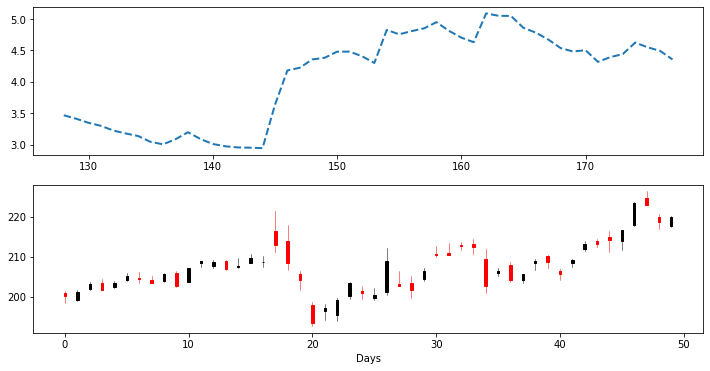

In [61]:
# Plot last 50 values

fig, ax = plt.subplots(2, figsize=(12,6))


t = np.arange(N - 1, num_days)
ax[0].plot(t[-50:], atr[-50:], '--', lw=2.0, label='ATR')
candlestick_ohlc(ax[1], zip(np.arange(len(high[-50:])),
                         open[-50:], high[-50:],
                         low[-50:], close[-50:]))

plt.xlabel('Days')
plt.show()

**Interpreting Moving Averages**

https://www.tradingview.com/wiki/Moving_Average

## Simple Moving Average (SMA)
 - For analyzing time-series data
 - Moving window of N periods
 - Mean of values inside the window
 - an unweighted moving average

In [62]:
x = np.array([11,12,13,14,15,16,17,18])
x

array([11, 12, 13, 14, 15, 16, 17, 18])

In [63]:
# 5-Day Moving Average
N = 5

In [64]:
# First day of 5-day SMA
np.sum(x[0:N])/N

13.0

In [65]:
# Second day of 5-day SMA
np.sum(x[1:N+1])/N

14.0

In [66]:
# Third day of 5-day SMA
np.sum(x[2:N+2])/N

15.0

In [67]:
# Fourth day of 5-day SMA
np.sum(x[3:N+3])/N

16.0

In [ ]:
# Using np.convolve

In [68]:
N = 5
weights = np.ones(N)/N  # each weight is 1/5
print("Weights", weights)

Weights [0.2 0.2 0.2 0.2 0.2]


In [69]:
np.convolve(x, weights)

array([ 2.2,  4.6,  7.2, 10. , 13. , 14. , 15. , 16. , 13.2, 10.2,  7. ,
        3.6])

In [70]:
np.convolve(x, weights)[N-1:-(N-1)] # Remove N-1 entries at the beginning and the end

array([13., 14., 15., 16.])

In [71]:
# Using the dataset

# Import Date and closing price from the file (columns 0 and 5)

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [72]:
len(close)

178

In [73]:
# 20-day moving window

N = 20

In [74]:
weights = np.ones(N)/N

In [75]:
sma = np.convolve(c, weights)[N-1:-(N-1)]
len(sma)

159

In [76]:
len(close[N-1:])

159

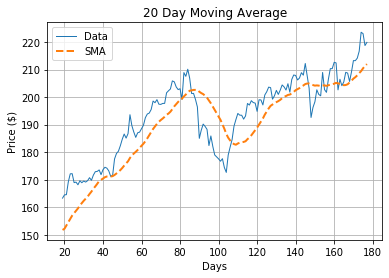

In [77]:
t = np.arange(N - 1, len(close))

plt.plot(t, close[N-1:], lw=1.0, label="Data")

plt.plot(t, sma, '--', lw=2.0, label="SMA")

plt.title("20 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

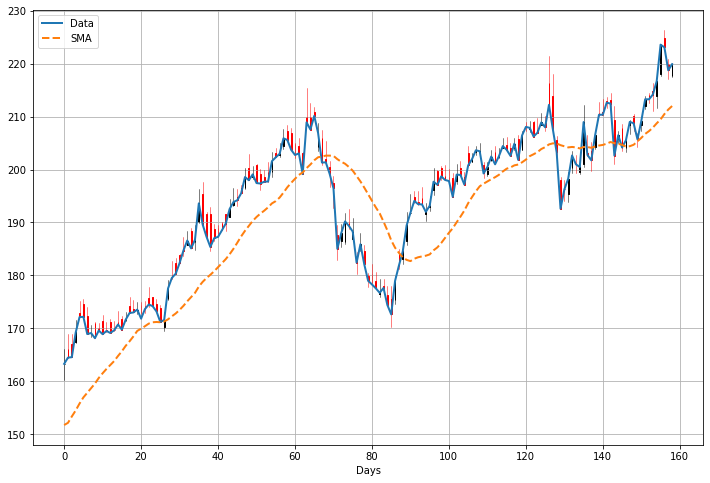

In [78]:
fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, zip(np.arange(len(high[N-1:])),
                         open[N-1:], high[N-1:],
                         low[N-1:], close[N-1:]))

t1 = np.arange(0, len(close) - N + 1)

plt.plot(t1, close[N-1:], lw=2.0, label="Data")

plt.plot(t1, sma, '--', lw=2.0, label="SMA")


plt.xlabel('Days')

plt.grid()
plt.legend()
plt.show()


## Weighted Moving Average (WMA)

In [79]:
x = np.array([5,6,7,8,9])
weights = np.array([5,4,3,2,1]) # older dates get lower weights
np.convolve(x, weights)/np.sum(weights)

array([1.66666667, 3.33333333, 4.93333333, 6.4       , 7.66666667,
       5.33333333, 3.33333333, 1.73333333, 0.6       ])

In [80]:
x = np.array([11,12,13,14,15,16,17,18])
x

array([11, 12, 13, 14, 15, 16, 17, 18])

In [81]:
# 5-Day Moving Average
N = 5

In [82]:
weights = np.arange(1, N+1)
weights

array([1, 2, 3, 4, 5])

In [83]:
# First day of 5-day WMA
np.sum(x[0:N] * weights)/sum(weights)

13.666666666666666

In [84]:
# Second day of 5-day WMA
np.sum(x[1:N+1] * weights)/sum(weights)

14.666666666666666

In [85]:
# Third day of 5-day WMA
np.sum(x[2:N+2] * weights)/sum(weights)

15.666666666666666

In [86]:
# Fourth day of 5-day WMA
np.sum(x[3:N+3] * weights)/sum(weights)

16.666666666666668

In [87]:
# Same as

(np.convolve(x, weights[::-1])[N-1:-(N-1)])/sum(weights) # convolution requires weights reversed

array([13.66666667, 14.66666667, 15.66666667, 16.66666667])

In [88]:
# Using the dataset

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [89]:
# 20-day moving window

N = 20

In [90]:
weights = np.arange(1, N+1)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [91]:
wma = (np.convolve(c, weights[::-1])[N-1:-(N-1)])/sum(weights)
wma[:5]

array([153.29871429, 154.5117619 , 155.69233333, 157.20319048,
       158.88204762])

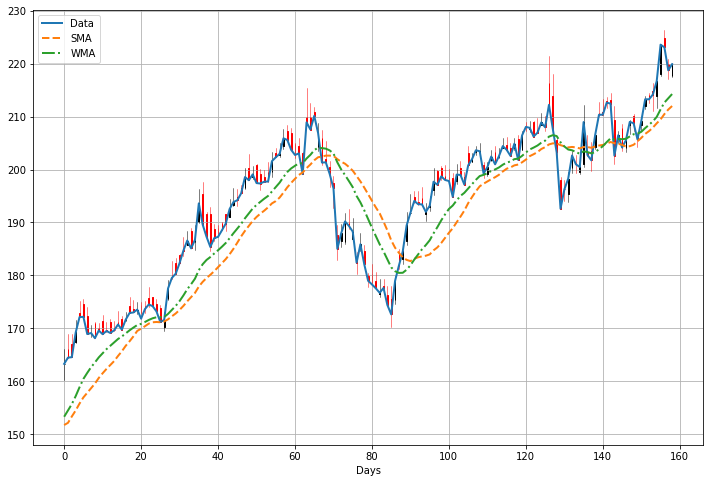

In [92]:
fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, zip(np.arange(len(high[N-1:])),
                         open[N-1:], high[N-1:],
                         low[N-1:], close[N-1:]))

t1 = np.arange(0, len(close) - N + 1)

plt.plot(t1, close[N-1:], lw=2.0, label="Data")

plt.plot(t1, sma, '--', lw=2.0, label="SMA")

plt.plot(t1, wma, '-.', lw=2.0, label="WMA")


plt.xlabel('Days')

plt.grid()
plt.legend()
plt.show()


## Exponential Moving Average (EMA)
 - For analyzing time-series data
 - Alternative to SMA
 - Moving window of N periods
 - Uses exponentially decreasing weights
 - Gives higher weights to recent prices
 

In [93]:
x = np.array([11,12,13,14,15,16,17,18])
x

array([11, 12, 13, 14, 15, 16, 17, 18])

In [102]:
N = 5
v = np.linspace(0, 1, N)
print("v =", v)
weights = np.exp(v)  # e^value
print("weights =", weights)

v = [0.   0.25 0.5  0.75 1.  ]
weights = [1.         1.28402542 1.64872127 2.11700002 2.71828183]


In [95]:
# Normalize weights
weights /= weights.sum()
print("Weights", weights)

Weights [0.11405072 0.14644403 0.18803785 0.24144538 0.31002201]


In [96]:
np.convolve(x, weights[::-1])[N-1:-(N-1)]

array([13.48694393, 14.48694393, 15.48694393, 16.48694393])

In [97]:
# Using the dataset

# Import Date and closing price from the file (columns 0 and 5)

dates, close = np.loadtxt(datafile, delimiter=',', 
                          skiprows=1, usecols=(0,5), 
                          converters={0: datestr2num},
                          encoding='utf-8',
                          unpack=True)

close = np.round(close, 2)

In [98]:
# 20-day moving window

N = 20

In [99]:
weights = np.exp(np.linspace(0, 1, N))

# Normalize weights
weights /= weights.sum()

In [100]:
ema = np.convolve(c, weights[::-1])[N-1:-(N-1)]
len(ema)

159

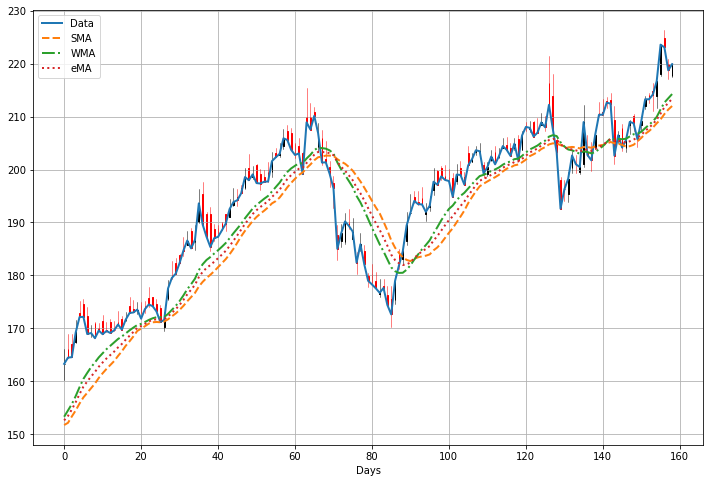

In [101]:
fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, zip(np.arange(len(high[N-1:])),
                         open[N-1:], high[N-1:],
                         low[N-1:], close[N-1:]))

t1 = np.arange(0, len(close) - N + 1)

plt.plot(t1, close[N-1:], lw=2.0, label="Data")

plt.plot(t1, sma, '--', lw=2.0, label="SMA")

plt.plot(t1, wma, '-.', lw=2.0, label="WMA")

plt.plot(t1, ema, ':', lw=2.0, label="eMA")


plt.xlabel('Days')

plt.grid()
plt.legend()
plt.show()